## Te vs. r plots

In [1]:
import matplotlib.pyplot as pp
import numpy as np
import pandas as pd

import discharge_numbers
import TeIsatFromWeb

export_graphs = True

In [2]:
discharge_serie = discharge_numbers.shotlist_Te_20_600
discharge_isat = discharge_numbers.shotlist_Isat_20_600
discharge_r = discharge_numbers.rs_Te_20_600

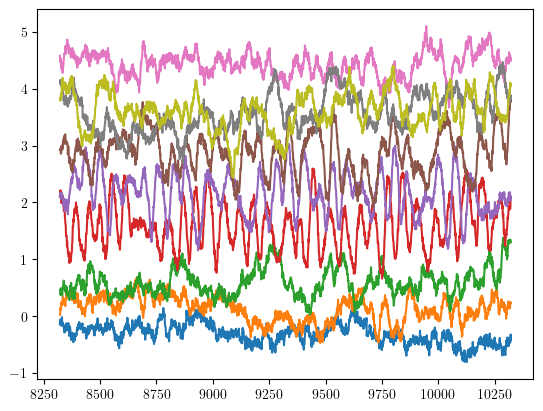

In [3]:
Tes, TesErr, rs = [], [], []
for shot, r in zip(discharge_serie, discharge_r):
    Te = TeIsatFromWeb.get_Te(shot, discharge_serie[0])
    Tes.append(np.mean(Te))
    TesErr.append(np.std(Te))
    rs.append(r)
    pp.plot(Te)
pp.show()

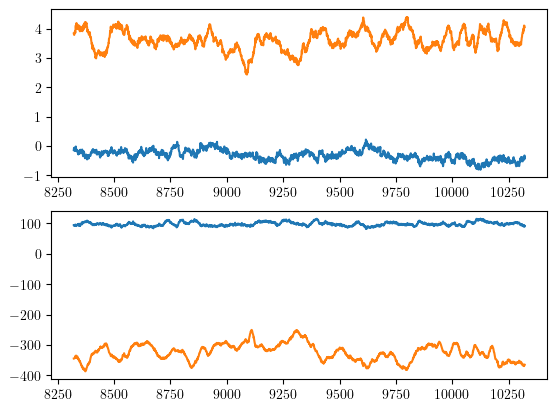

In [4]:
pp.subplot(2, 1, 1)
Te_1 = TeIsatFromWeb.get_Te(discharge_serie[0], reference_shot=discharge_serie[0])
Te_2 = TeIsatFromWeb.get_Te(discharge_serie[-1], reference_shot=discharge_serie[0])
pp.plot(Te_1)
pp.plot(Te_2)

pp.subplot(2, 1, 2)
Isat_1, _ = TeIsatFromWeb.get_Isat(discharge_serie[0], reference_shot=discharge_serie[0], Te=True)
Isat_2, _ = TeIsatFromWeb.get_Isat(discharge_serie[-1], reference_shot=discharge_serie[0], Te=True)
pp.plot(Isat_1)
pp.plot(Isat_2)

<ErrorbarContainer object of 3 artists>

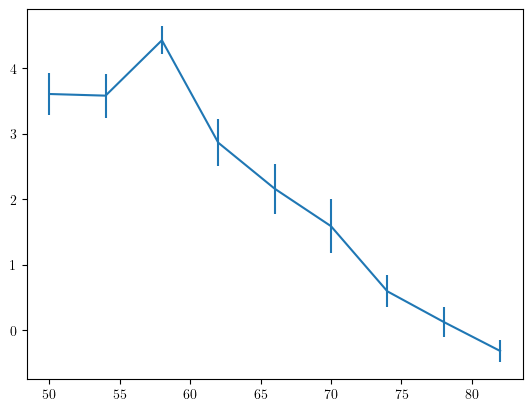

In [5]:
pp.errorbar(rs, Tes, yerr=TesErr)

### Repeatability

In [6]:
Ips = []
Uls = []
for shot in discharge_serie:
    df1 = pd.read_csv(f'http://golem.fjfi.cvut.cz/shots/{shot}/Diagnostics/BasicDiagnostics/Results/Ip.csv', names=['time', 'Ip'])
    df2 = pd.read_csv(f'http://golem.fjfi.cvut.cz/shots/{shot}/Diagnostics/BasicDiagnostics/Results/U_loop.csv', names=['time', 'Ul'])
    Ips.append(df1['Ip'])
    Uls.append(df2['Ul'])

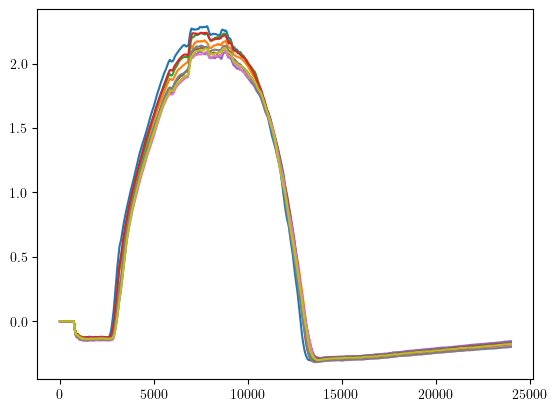

In [7]:
for ip in Ips:
    pp.plot(ip)

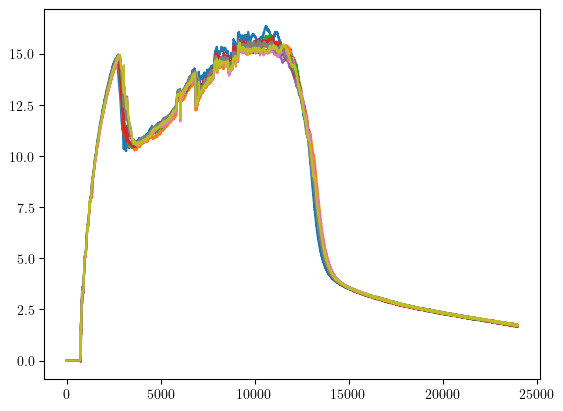

In [8]:
for ul in Uls:
    pp.plot(ul)

### Finding plasma boundary

In [9]:
r_result = 0
max_LP = 0
lps = []
for shot, r in zip(discharge_serie, discharge_r):
    LP = TeIsatFromWeb.get_LP(shot)
    lps.append(np.mean(LP))
    if np.mean(LP) > max_LP:
        max_LP = np.mean(LP)
        r_result = r

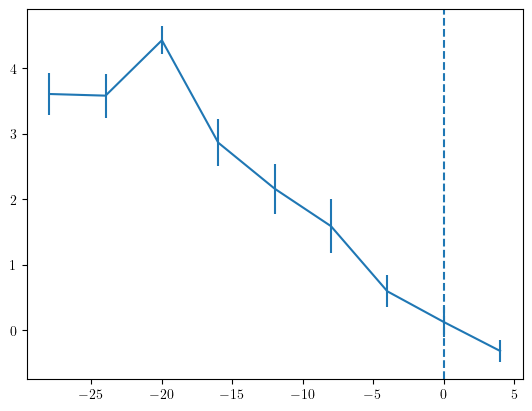

In [10]:
pp.errorbar(np.array(rs)-r_result, Tes, yerr=TesErr)
pp.axvline(x=0, c='tab:blue', linestyle='dashed')

### Heat flux

In [11]:
gamma_predict = 6.945   # eV
gamma_simulation = 10.054  # eV
q = 1.602176e-19    # C
kB = 8.617333e-5    # eV/K
r_lp = 0.00045    # m
n_0 = 1e18  # m^-3
h = 0.0015   # m
A_simple = 2*np.pi*r_lp*h+np.pi*r_lp**2

a = 0.007070202241047162  # input coefficient from probe_width_analysis
funcTe = lambda t: a/t**0.5

In [12]:
def QU(Te, Isat, U):
    alpha = funcTe(Te)
    return gamma_predict*kB*Te*(Isat-np.abs(alpha*U))/(A_simple)

def QUGC(Te, Isat, U):
    alpha = funcTe(Te)
    return gamma_simulation*kB*Te*(Isat-np.abs(alpha*U))/(A_simple)

def Q(Te, Isat):
    return gamma_predict*kB*Te*Isat/(A_simple)

In [13]:
Qs = []
QUs = []
QUGCs = []
QErr, QUErr, QUGCErr = [], [], []   # really simplified error calculation
for Te, TErr, shot in zip(Tes, TesErr, discharge_isat):
    Isat = np.mean(TeIsatFromWeb.get_Isat(shot, reference_shot=discharge_serie[0]))
    U = np.mean(TeIsatFromWeb.get_LP(shot, reference_shot=discharge_serie[0], Te=False))
    
    QErr.append(Q(TErr, Isat))
    QUErr.append(QU(TErr, Isat, U))
    QUGCErr.append(QUGC(TErr, Isat, U))
    QUs.append(QU(Te, Isat, U))
    Qs.append(Q(Te, Isat))
    QUGCs.append(QUGC(Te, Isat, U))

/tmp/ipykernel_18485/254648172.py:11: RuntimeWarning: invalid value encountered in scalar power
  funcTe = lambda t: a/t**0.5


<>:3: SyntaxWarning: invalid escape sequence '\,'
<>:4: SyntaxWarning: invalid escape sequence '\,'
<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:26: SyntaxWarning: invalid escape sequence '\,'
<>:27: SyntaxWarning: invalid escape sequence '\,'
<>:3: SyntaxWarning: invalid escape sequence '\,'
<>:4: SyntaxWarning: invalid escape sequence '\,'
<>:5: SyntaxWarning: invalid escape sequence '\,'
<>:26: SyntaxWarning: invalid escape sequence '\,'
<>:27: SyntaxWarning: invalid escape sequence '\,'
/tmp/ipykernel_18485/9298790.py:3: SyntaxWarning: invalid escape sequence '\,'
  ax[0].errorbar(np.array(rs)-r_result, np.array(Qs)/1000, yerr=np.array(QErr)/1000, capsize=5, c='tab:blue', fmt='.', label='$Q(I), \, \gamma_{\mathrm{predikce}}$')
/tmp/ipykernel_18485/9298790.py:4: SyntaxWarning: invalid escape sequence '\,'
  ax[0].errorbar(np.array(rs)-r_result, np.array(QUs)/1000, yerr=np.array(QUErr)/1000, capsize=5, c='tab:red', fmt='x', label='$Q(I, U), \, \gamma_{\mathrm{predikce}}$')
/t

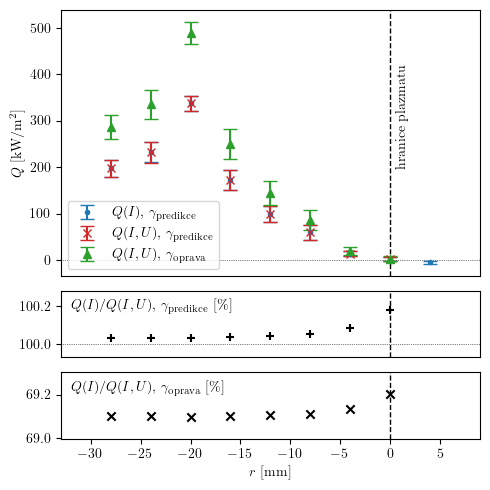

In [17]:
lw=1
fig, ax = pp.subplots(3,1, figsize=(5, 5), gridspec_kw={'height_ratios': [4, 1, 1]})
ax[0].errorbar(np.array(rs)-r_result, np.array(Qs)/1000, yerr=np.array(QErr)/1000, capsize=5, c='tab:blue', fmt='.', label='$Q(I), \, \gamma_{\mathrm{predikce}}$')
ax[0].errorbar(np.array(rs)-r_result, np.array(QUs)/1000, yerr=np.array(QUErr)/1000, capsize=5, c='tab:red', fmt='x', label='$Q(I, U), \, \gamma_{\mathrm{predikce}}$')
ax[0].errorbar(np.array(rs)-r_result, np.array(QUGCs)/1000, yerr=np.array(QUGCErr)/1000, capsize=5, c='tab:green', fmt='^', label='$Q(I, U), \, \gamma_{\mathrm{oprava}}$')
ax[0].axvline(x=0, c='black', linestyle='dashed', linewidth=lw)
ax[0].legend()
ax[2].set_xlabel('$r$ [mm]')
ax[0].set_ylabel('$Q$ [kW/m$^2$]')
ax[0].set_xticks([], [])
ax[1].set_xticks([], [])
ax[0].text(0.6, 200, "hranice plazmatu", rotation=90)
perc = np.array(Qs)/np.array(QUs)*100
perc2 = np.array(Qs)/np.array(QUGCs)*100
ax[1].scatter(np.array(rs)-r_result, perc, c='black', marker='+')
ax[2].scatter(np.array(rs)-r_result, perc2, c='black', marker='x')
ax[1].set_xlim(np.min(np.array(rs)-r_result)-5, np.max(np.array(rs)-r_result)+5)
ax[0].set_xlim(np.min(np.array(rs)-r_result)-5, np.max(np.array(rs)-r_result)+5)
ax[1].set_ylim(np.min(perc[~np.isnan(perc)])-0.1, np.max(perc[~np.isnan(perc)])+0.1)
ax[2].set_ylim(np.min(perc2[~np.isnan(perc2)])-0.1, np.max(perc2[~np.isnan(perc2)])+0.1)
ax[1].axhline(y=100, c='black', linestyle='dotted', linewidth=0.5)
ax[0].axhline(y=0, c='black', linestyle='dotted', linewidth=0.5)
ax[1].axvline(x=0, c='black', linestyle='dashed', linewidth=lw)
ax[2].axvline(x=0, c='black', linestyle='dashed', linewidth=lw)
ax[2].set_xlim(np.min(np.array(rs)-r_result)-5, np.max(np.array(rs)-r_result)+5)
ax[1].text(-32, 100.18, '$Q(I)/Q(I,U), \, \gamma_{\mathrm{predikce}}$ [\\%]', rotation=0)
ax[2].text(-32, 69.21, '$Q(I)/Q(I,U), \, \gamma_{\mathrm{oprava}}$ [\\%]', rotation=0)
pp.tight_layout()
if export_graphs: pp.savefig('/home/jachym/Temporary/graph_export/QErr.pgf', format='pgf')
pp.show()